In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, simpson, quad, dblquad, fixed_quad
from scipy.special import roots_legendre

# Problema 1. inductancia

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación
 
$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$
 
donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:
 
```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```
 
 
donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:
 
 
- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [20]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo s
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente A

L = 0.98 # H
R = 0.142 # Ohms

df_P1 = {'Tiempo (s)': t, 'Corriente (A)': i}

df_P1 = pd.DataFrame(df_P1)

df_P1

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [21]:
#Diferencias finitas
def finita(f, xList, h):
    '''  
    Calcula la derivada para una funcion teniendo en cuenta lista de abscisas dado con un incremento dado usando el metodo de
    diferencias finitas

    Entradas:

    -f: funcion a derivar
    -xList: Lista de abscisas
    -h: incremento

    Salida:

    -df: arrray con los puntos en y de la derivada en x
    ''' 

    adelante = lambda f,x,h: (f(x+h) - f(x))/h # dif adelante
    centrada = lambda f,x,h: (f(x+h) - f(x-h))/(2*h) # diferencia centrada
    atras = lambda f,x,h: (f(x) - f(x-h))/h # dif adelante

    n = len(xList)
    df = np.zeros(n)

    for i in range(n):

        x = xList[i]

        if i == 0:
            df[i] = (adelante(f, x, h))
        elif i == n-1:
            df[i] = (atras(f, x, h))
        else:
            df[i] = (centrada(f, x, h))
    
    return(df)



def finita_3(f, xList, h):
    '''  
    Calcula la derivada para una funcion teniendo en cuenta lista de abscisas dado con un incremento dado usando el metodo de
    3 puntos

    Entradas:

    -f: funcion a derivar
    -xList: Lista de abscisas
    -h: incremento

    Salida:

    -df: arrray con los puntos en y de la derivada en x
    ''' 

    adelante = lambda f,x,h: (-3*f(x) +4*f(x+h) -f(x+ 2*h))/(2*h) # Diferencia adelantada
    centrada = lambda f,x,h: (f(x+h) - f(x-h))/(2*h) # diferencia centrada
    atras = lambda f,x,h: (3*f(x) -4*f(x-h) +f(x- 2*h))/(2*h) # Diferencia atrasada

    n = len(xList)
    df = np.zeros(n)

    for i in range(n):

        x = xList[i]

        if i == 0:
            df[i] = (adelante(f, x, h))
        elif i == n-1:
            df[i] = (atras(f, x, h))
        else:
            df[i] = (centrada(f, x, h))
    
    return(df)

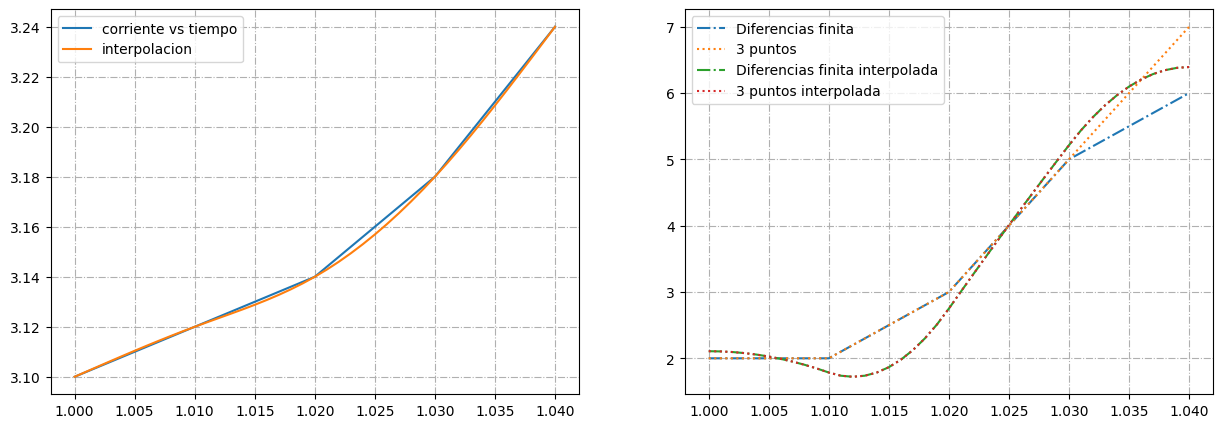

In [22]:
# Interpolacion
interp_corriente = CubicSpline(t, i, bc_type= 'natural')

# Evalua las derivadas en cada punto
h = (max(t) - min(t))/(len(t) - 1) # Los puntos estan equiespaciados, (len(t) -1 es la longitud de la lista)
df_finita_I = finita(interp_corriente, t, h) # diferencias finitas en cada punto
df_3Puntos_I = finita_3(interp_corriente, t, h) # 3 puntos en cada punto

x = np.arange(min(t), max(t), 0.001)
y = interp_corriente(x)

# Derivadas exactas
h_exacta = 0.0001
df_finita_I_Exacta = finita(interp_corriente, x, h_exacta) # diferencias finitas exactas 
df_3Puntos_I_Exacta = finita_3(interp_corriente, x, h_exacta) # 3 puntos exactas

'''-------------------------------------Graficas-------------------------------------'''  
fig, ax = plt.subplots(1, 2, figsize= (15, 5))

# Funcion
ax[0].plot(t, i, label= 'corriente vs tiempo')
ax[0].plot(x, y, label= 'interpolacion')

ax[0].grid(linestyle= '-.')
ax[0].legend()

#Derivadas
ax[1].plot(t, df_finita_I, '-.', label= 'Diferencias finita')
ax[1].plot(t, df_3Puntos_I, ':', label= '3 puntos')

ax[1].plot(x, df_finita_I_Exacta, '-.', label= 'Diferencias finita interpolada')
ax[1].plot(x, df_3Puntos_I_Exacta, ':', label= '3 puntos interpolada')

ax[1].grid(linestyle= '-.')
ax[1].legend()

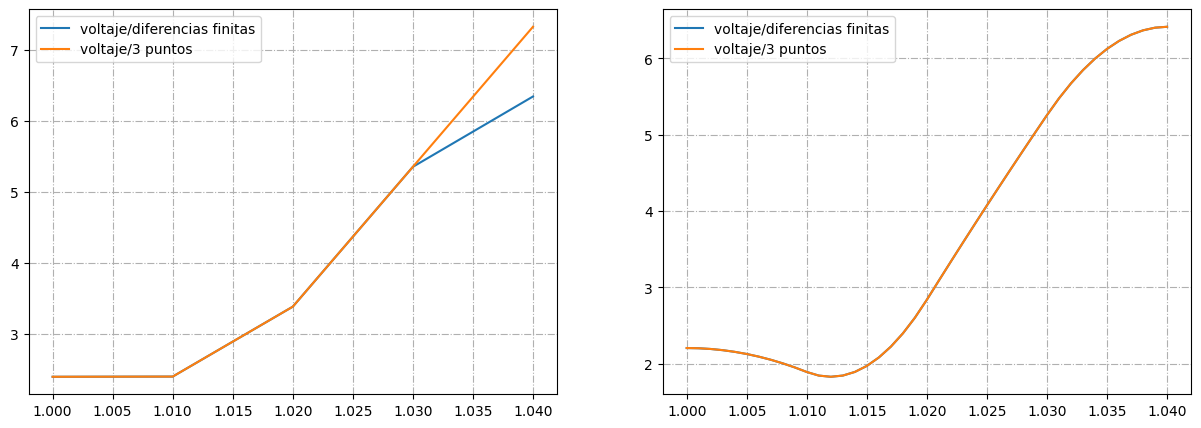

In [23]:
L = 0.98 # H
R = 0.142 # Ohms
V = lambda di, i: L*di + R*i

V_puntos_dfFinita = V(df_finita_I, i) # Aproximacion del voltaje para cada punto usando diferencias finitas
V_puntos_df3Puntos = V(df_3Puntos_I, i) # Aproximacion del voltaje para cada punto usando 3 puntos

V_Exacta_dfFinita = V(df_finita_I_Exacta, x) # Aproximacion general usando diferencias finitas
V_Exacta_df3Puntos = V(df_3Puntos_I_Exacta, x) # Aproximacion general usando diferencias 3 puntos

'''-------------------------------------Graficas-------------------------------------'''  
fig, ax = plt.subplots(1, 2, figsize= (15, 5))

# Puntos dados
ax[0].plot(t, V_puntos_dfFinita, label= 'voltaje/diferencias finitas')
ax[0].plot(t, V_puntos_df3Puntos, label= 'voltaje/3 puntos')

ax[0].grid(linestyle= '-.')
ax[0].legend()

# generales
ax[1].plot(x, V_Exacta_dfFinita, label= 'voltaje/diferencias finitas')
ax[1].plot(x, V_Exacta_df3Puntos, label= 'voltaje/3 puntos')

ax[1].grid(linestyle= '-.')
ax[1].legend()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```
 
- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.
 
- ¿Cuál será la velocidad para $t=12$?

Las velocidades instantaneas en cada puntos son, respectivamente:
[74.36219336 76.27561328 83.17316017 65.22077923 65.64862916 92.67568542]
Las velocidad instantanea en t = 12 es: [89.67297946]


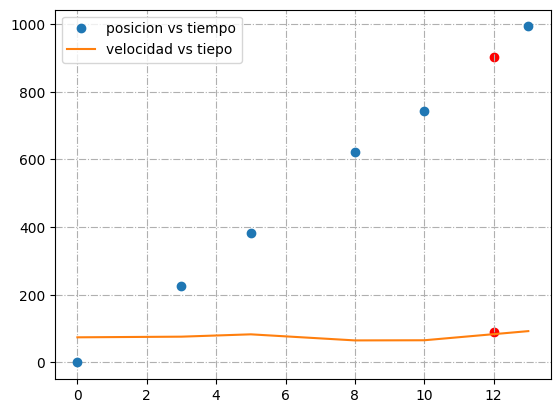

In [24]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x_posicion = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

xt = CubicSpline(t, x_posicion, bc_type= 'natural')

h = 0.0001
v = finita(xt, t, h)
v12 = finita(xt, [12], h)

print(f'Las velocidades instantaneas en cada puntos son, respectivamente:\n{v}')
print(f'Las velocidad instantanea en t = 12 es: {v12}')

# Grafica de posicion vs tiempo
plt.plot(t, x_posicion, 'o', label= 'posicion vs tiempo')
plt.scatter(12, xt(12), color= 'red')

# Grafica de velocidad vs tiempo
plt.plot(t, v, label= 'velocidad vs tiepo')
plt.scatter(12, v12, color= 'red')

plt.grid(linestyle= '-.')
plt.legend()

# 3.
# 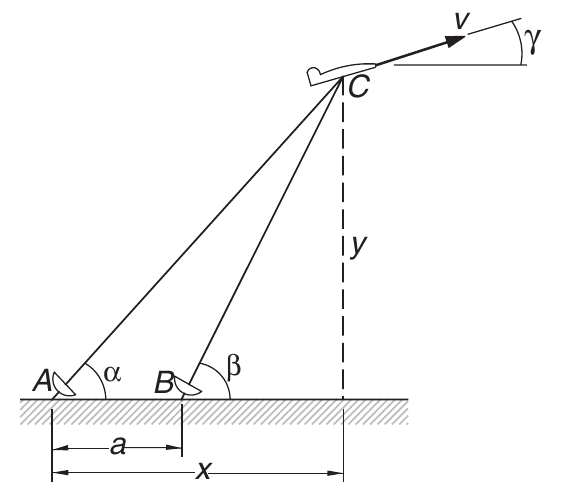 
 
Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son 
 
```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
 
df = pd.DataFrame(data)
```
 
Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:
 
$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$
 
$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [25]:
# Datos
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

# Calculos de las coordenadas X y Y en base a los angulos dados
a_distancia = 500 #m

# Usamos los grados en radianes con np.radians()
x_posicion_p2 = a_distancia*(np.tan(np.radians(data['beta (°)'])))/(np.tan(np.radians(data['beta (°)'])) - np.tan(np.radians(data['alpha (°)'])))
y_posicion_p2 = a_distancia*(np.tan(np.radians(data['alpha (°)'])) * np.tan(np.radians(data['beta (°)'])))/(np.tan(np.radians(data['beta (°)'])) - np.tan(np.radians(data['alpha (°)'])))

data['x (m)'] = x_posicion_p2
data['y (m)'] = y_posicion_p2

df = pd.DataFrame(data)
df

,t (s),alpha (°),beta (°),x (m),y (m)
0,9,54.80,65.59,1401.918398,1987.346016
1,10,54.06,64.59,1450.497006,2000.840713
2,11,53.34,63.62,1498.640350,2013.512411


In [26]:
# vector derivada de la posicion respecto a t
Vx, Vy = np.gradient(df['x (m)'], df['t (s)'], edge_order= 2) , np.gradient(df['y (m)'], df['t (s)'], edge_order= 2)
velocidad = np.linalg.norm(np.array([Vx, Vy]), axis= 0) # Magnitudes de las velocidades
gamma = np.arctan(Vy/Vx) # Angulos gamma

df['v (m/s)'] = velocidad
df['\u03B3 (°)'] = np.degrees(gamma)

display(df)
print(f'La velocidad en t = 10 es: {df.loc[df["t (s)"] == 10, "v (m/s)"].values[0]} m/s',
      f'y su anulo \u03B3 es de {df.loc[df["t (s)"] == 10, "γ (°)"].values[0]}°')

,t (s),alpha (°),beta (°),x (m),y (m),v (m/s),γ (°)
0,9,54.80,65.59,1401.918398,1987.346016,50.739091,15.906757
1,10,54.06,64.59,1450.497006,2000.840713,50.099442,15.137988
2,11,53.34,63.62,1498.640350,2013.512411,49.469044,14.349481


La velocidad en t = 10 es: 50.09944162965305 m/s y su anulo γ es de 15.137987979364004°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:
 
```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [27]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# DataFrame 

# Posicion (integral del tiempo)
Vt = CubicSpline(t, v, bc_type='natural') # Polinomio de interpolacion para calcular la posicion usando el metodo quad
a, b = 0, 28
x_posicion_p3 = quad(Vt, a, b)[0]
aceleracion = np.gradient(v, t, edge_order= 2)[np.where(t == 28)[0]][0]

print(f'La distancia recorrida para t = 28s es de: {x_posicion_p3}\n'
      f'La aceleracion en t = 28s es de: {aceleracion}'
)

La distancia recorrida para t = 28s es de: 2318.8364704769656
La aceleracion en t = 28s es de: 1.7249999999999979


# 5. Concentracion de una sustancia
 
El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:
 
$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo
 
 
La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:
 
$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$
donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:
 
 
$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³
 
# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [28]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³
 
# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

# Area superficial en m**2
As = -np.gradient(V, z, edge_order= 2) 
Asz = CubicSpline(z, As, bc_type= 'natural') # Funcion del area superficial

# Funcion de la concentracion
cz = CubicSpline(z, c, bc_type= 'natural')

# Volumen total
a, b = 0, Z
Vt = quad(Asz, a, b)[0]

# Concentracion promedio
f_prom = lambda z: Asz(z) * cz(z)

c_prom = quad(f_prom, a, b)[0] / Vt

print(f'La concentracion promedio es de: {c_prom} g/m**3') #g/m**3

La concentracion promedio es de: 8.269878357304595 g/m**3


# 6. Probabilidad del electron
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:
 
$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$
 
La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:
 
$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.
 
- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
     
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.

In [48]:
f = lambda r: 1/8 * r**2 * (2-r)**2 *np.e**(-r)

a, b = 10, 25

#metodo de cuadratura
integral_cuad = quad(f, a, b)[0]

print(f'usando el metodo trapesoidal: {integral_cuad}\n')

integral_indef = quad(f, 0, np.inf)[0]
print(integral_indef)

usando el metodo trapesoidal: 0.05951862509528966

1.0000000000000004


# 7. Fuerza gravitacional entre 2 cuerpos

Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

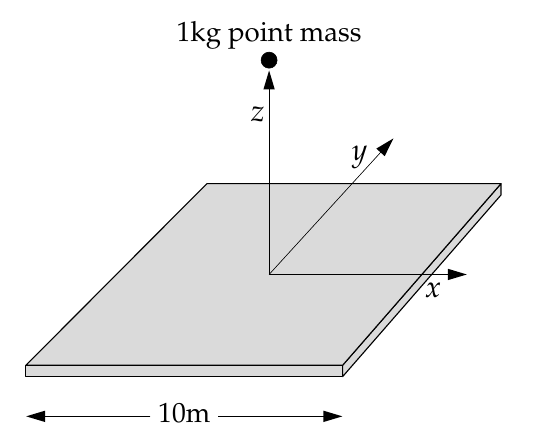

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


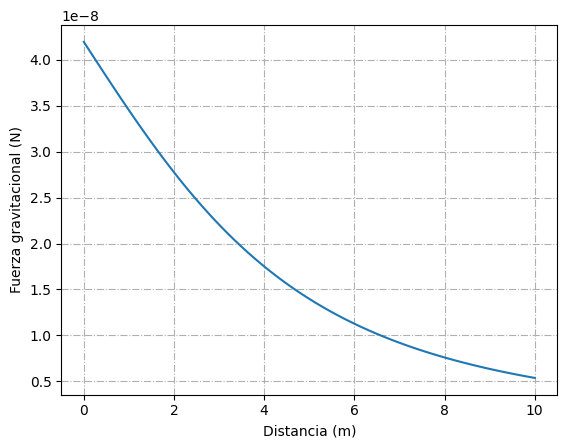

In [30]:
G = 6.674e-11 # Constante gravitacional
M = 10000 # kg
L = 10 # m
sigma = M/(L**2)

f_interna = lambda x, y, z: 1/((x**2 + y**2 + z**2)**(3/2)) # Funcion dentro de las integrales

# Ejes X y Y de la grafica
z_values = np.linspace(0.0001, 10, 100)
F_values = np.zeros_like(z_values)

for i in range(len(F_values)):
    z = z_values[i] # valor de z en la iteracion

    a, b = -L/2, L/2 # Limites de integracion (solo a y b, pues al ser un aplaca cuadrada, para dx y dy la integral recorre los mismos valores)

    F = G*sigma*z * dblquad(f_interna, a, b, a, b, args= (z,))[0] # Fuerza
    F_values[i] = F

plt.plot(z_values, F_values, label= 'Fuerza vs distancia en y')

plt.xlabel('Distancia (m)')
plt.ylabel('Fuerza gravitacional (N)')

plt.grid(linestyle= '-.')

